In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns 
import random
%matplotlib inline
sns.set()

# Batch Gradient Descent Implementation

In [2]:
## Using mean sum of square errors as cost funtion
def cost_func(X, Y, B):
    m = len(Y)
    theta = np.sum((X.dot(B) - Y)**2) / (2*m)
    return theta

in order to find optimal beta values, we need to minimise the cost function (sum of square errors here).
this is done by gradient descent: to find the minimum of the cost function we need to find where its derivative it is equal to zero. to get there we update betas by calculating the gradient (partial derivative) of the function and following it towards the minimum (minus sign before alpha). alpha is scaling, or learning rate.

In [3]:
def gradient_descent(X, Y, B, alpha, n_iter):
    cost_history = []
    beta_history = []
    beta_history.append(B)
    m = len(Y)
    for i in range(n_iter):
        # predicted value
        y_hat = np.dot(X,B)
        # error
        loss = y_hat - Y
        # Gradient Calculation
        gradient = np.dot(X.T, loss)/m
        #print('GRAD', gradient)
        # adjust value of beta(s) based on gradient
        B = B - alpha * gradient
        beta_history.append(B)
        #print('beta', B)
        # Calculate cost
        cost = cost_func(X, Y, B)
        cost_history.append(cost)
    return B, cost_history, beta_history

### Add evaluation funtions:
root mean square error and R2 score

In [4]:
# RMSE for model evaluation
def rmse(y, y_pred):
    return np.sqrt(sum((y - y_pred)**2) / len(y))

# R2 Score
def r2_score(y, y_pred):
    mean_y = np.mean(y)
    ss_tot = np.sum((y - mean_y)**2)
    ss_res = np.sum((y - y_pred)**2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

## Crete Simple Data Set

In [5]:
## Create data
x = np.arange(0.0, 20, 0.1)
y = [i*0.75+np.random.normal() for i in x]
# add column of 1s for intercept evaluation
x0 = np.ones(len(x))
predictor = np.array([x0, x]).T

## Fit line

In [6]:
beta_init = np.array([0, 0])
alpha = 0.01
iterations=21

beta, cost_hist, beta_hist = gradient_descent(predictor, y, beta_init, alpha, iterations)

In [7]:
# New Values of B
print('Beta:', beta)
# Cost History
print('cost history:', cost_hist[-10:])

Beta: [ 0.0575006   0.74938919]
cost history: [0.54715391638065669, 0.54715367114593294, 0.54715342722579097, 0.54715318453556661, 0.54715294306055984, 0.54715270279375505, 0.5471524637290055, 0.54715222586028589, 0.54715198918161168, 0.54715175368702862]


In [8]:
y_pred = np.dot(predictor, beta)

print('RMSE:', rmse(y, y_pred))
print('R2:', r2_score(y, y_pred))

RMSE: 1.04608962684
R2: 0.944566152411


plot figure with streight line calculated from betas obtained via gradient_descent

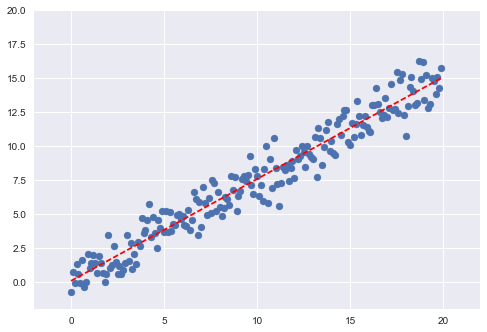

In [9]:
## Plot Figure:
plt.ylim([-2,20])
plt.xlim([-2,22])
plt.scatter(x,y)
plt.plot(x,y_pred, 'r--')
plt.show()

## Create Animation 
adapted from https://www.kaggle.com/ronaldtroncoso20/global-terrorism-trends-animation

In [10]:
#Set the plot
fig = plt.figure()
ax = plt.axes()
plt.title('Batch Gradient Descent')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(predictor[:,1], y, color='b')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 20, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-1, 20, 50)
    y = beta_hist[i][1]*x + beta_hist[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f' % (cost_hist[i]))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=iterations, interval=0, blit=True)

anim.save('lin_reg_anim.gif', writer='imagemagick', fps = 7)


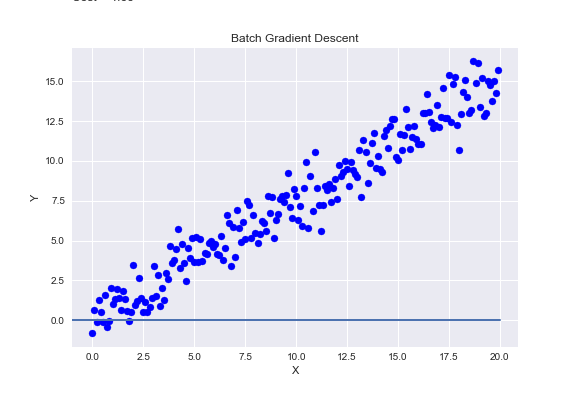

In [11]:
import io
import base64
from IPython.display import HTML

filename = 'lin_reg_anim.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

# OLS implementation:

For a single varibale we can implement the standard Ordinary Least Square solution to the linear regression problem.
All is required is to calculated the standard deviations of predictor and predicted variable and their correlation to find the optimal values for slope and intercept (here b1 and b0).

In [12]:
def OLS(X, Y):
    # Using OLS 
    b1 = np.corrcoef(X,Y)[0,1]*np.std(Y)/np.std(X)
    b0 = np.mean(Y) - b1*np.mean(X)
    return(b0, b1)

In [13]:
beta0, beta1 = OLS(x, y)

In [14]:
print('Beta:', beta0, beta1)

Beta: 0.076784919149 0.747936487297


In [15]:
ols_pred = beta0+beta1*x

print('RMSE:', rmse(y, ols_pred))
print('R2:', r2_score(y, ols_pred))

RMSE: 1.04604485375
R2: 0.944570897495


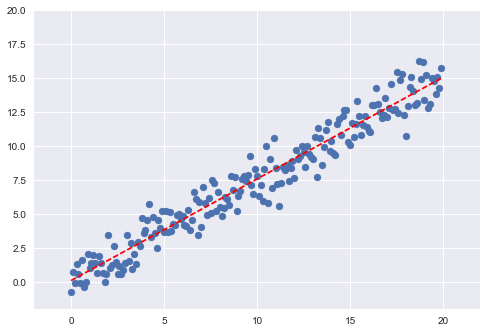

In [16]:
## Plot Figure:
plt.ylim([-2,20])
plt.xlim([-2,22])
plt.scatter(x,y)
plt.plot(x,ols_pred, 'r--')
plt.show()